In [ ]:
# print working directory
!pwd

# List files and folders
!ls

# Check the open jdk version on colab
!ls /usr/lib/jvm/

/content
sample_data
java-1.11.0-openjdk-amd64  java-11-openjdk-amd64


In [ ]:
# Download and install Java 8
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.2 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,248 kB]
Get:13 http://security.ubuntu.com/ubuntu jamm

In [ ]:
# Check if we have java 8 or not
!ls /usr/lib/jvm/

java-1.11.0-openjdk-amd64  java-11-openjdk-amd64  java-1.8.0-openjdk-amd64  java-8-openjdk-amd64


In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
#Unzipping the file
!tar -xzvf "/content/spark-3.5.0-bin-hadoop3.tgz"

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_memory_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/py_container_checks.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning_cleanup.py
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/decom.sh
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.5.0-bin-hadoop3/kubernetes/dockerfiles/spark/bindings/python/
spark-3.5.0-bin-hadoop3/kubern

In [ ]:
!file /content/spark-3.5.0-bin-hadoop3.tgz

/content/spark-3.5.0-bin-hadoop3.tgz: gzip compressed data, from Unix, original size modulo 2^32 445460480


In [ ]:
!pip install -q findspark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=ace9856ffc81f55a4b6bc4b635a551ae868aa0de1699934c251b2f60c3587730
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import findspark
findspark.init()

In [ ]:
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-3.5.0-bin-hadoop3"

import findspark
findspark.init()

In [ ]:
spark

NameError: ignored

In [ ]:
df=spark.read.csv("/content/sample_data/california_housing_train.csv",header=True)

In [ ]:
print(df)

DataFrame[longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string]


In [ ]:
df.show(10)

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-114.310000|34.190000|         15.000000|5612.000000|   1283.000000|1015.000000| 472.000000|     1.493600|      66900.000000|
|-114.470000|34.400000|         19.000000|7650.000000|   1901.000000|1129.000000| 463.000000|     1.820000|      80100.000000|
|-114.560000|33.690000|         17.000000| 720.000000|    174.000000| 333.000000| 117.000000|     1.650900|      85700.000000|
|-114.570000|33.640000|         14.000000|1501.000000|    337.000000| 515.000000| 226.000000|     3.191700|      73400.000000|
|-114.570000|33.570000|         20.000000|1454.000000|    326.000000| 624.000000| 262.000000|     1.925000|    

In [ ]:
df.count()

17000

In [ ]:
df.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housing_median_age: string (nullable = true)
 |-- total_rooms: string (nullable = true)
 |-- total_bedrooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- median_income: string (nullable = true)
 |-- median_house_value: string (nullable = true)



In [ ]:
len(df.columns)  #no of col

9

In [ ]:
df.count() #no of rows

17000

In [ ]:
df=df.dropDuplicates()

In [ ]:
df

DataFrame[longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string]

In [ ]:
selected_columns = ["longitude", "latitude", "total_rooms"]  # Replace with your column names
cropped_df = df.select(selected_columns)
cropped_df.show()

+-----------+---------+-----------+
|  longitude| latitude|total_rooms|
+-----------+---------+-----------+
|-116.460000|33.780000|2565.000000|
|-116.890000|32.850000|1743.000000|
|-116.900000|32.840000|4215.000000|
|-116.950000|33.310000|2921.000000|
|-117.000000|32.640000|3098.000000|
|-117.030000|32.690000|3201.000000|
|-117.030000|32.650000|1111.000000|
|-117.080000|32.760000|2547.000000|
|-117.100000|32.720000|1615.000000|
|-117.100000|32.710000| 939.000000|
|-117.140000|32.710000|1694.000000|
|-117.150000|32.710000| 217.000000|
|-117.210000|32.860000|3596.000000|
|-117.230000|34.150000|5036.000000|
|-117.230000|32.810000|3205.000000|
|-117.300000|33.170000|7880.000000|
|-117.330000|33.230000|1905.000000|
|-117.390000|33.950000|1599.000000|
|-117.420000|33.940000|1764.000000|
|-117.480000|33.940000|1625.000000|
+-----------+---------+-----------+
only showing top 20 rows



In [ ]:
joined_df = df.join(cropped_df, "longitude", "inner")
print(joined_df)
joined_df.show()

DataFrame[longitude: string, latitude: string, housing_median_age: string, total_rooms: string, total_bedrooms: string, population: string, households: string, median_income: string, median_house_value: string, latitude: string, total_rooms: string]
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+---------+-----------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value| latitude|total_rooms|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+---------+-----------+
|-116.460000|33.780000|         33.000000|2565.000000|    745.000000|2301.000000|638.000000|     2.547700|      83000.000000|33.820000|4863.000000|
|-116.460000|33.780000|         33.000000|2565.000000|    745.000000|2301.000000|638.000000|     2.547700|      83000.000000|33.780000|2565.000000|
|-116.8900

(array([3137., 4857., 1380., 1227., 1216., 1130., 1578., 1643.,  615.,
         217.]),
 array([  0. ,  83.9, 167.8, 251.7, 335.6, 419.5, 503.4, 587.3, 671.2,
        755.1, 839. ]),
 <BarContainer object of 10 artists>)

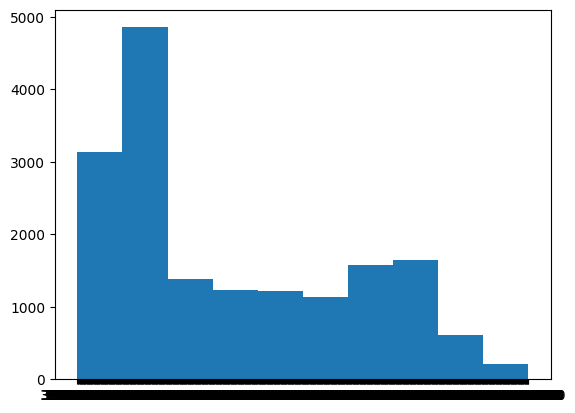

In [ ]:
pandas_df = df.select("latitude").toPandas()
import matplotlib.pyplot as plt
plt.hist(pandas_df["latitude"])

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, count

# Step 1: Create a SparkSession
spark = SparkSession.builder.appName("CustomerVisits").getOrCreate()

# Step 2: Create a DataFrame from the input data
data = [(500, 102), (5000, 103), (2000, 102), (400, 104), (570, 103), (3000, 105), (800, 105), (120, 103), (1500, 102)]
columns = ["Amount_Paid", "User_ID"]
df = spark.createDataFrame(data, columns)

# Step 3: Group by User_ID and aggregate total amount paid and count of visits
result_df = df.groupBy("User_ID").agg(
    sum("Amount_Paid").alias("Total_Amount_Paid"),
    count("User_ID").alias("Visit_Count")
)

# Step 4: Sort the result in descending order of visit count
result_df = result_df.orderBy("Visit_Count", ascending=False)

# Step 5: Show the final result
result_df.show()

+-------+-----------------+-----------+
|User_ID|Total_Amount_Paid|Visit_Count|
+-------+-----------------+-----------+
|    103|             5690|          3|
|    102|             4000|          3|
|    105|             3800|          2|
|    104|              400|          1|
+-------+-----------------+-----------+



When loading time is considered

In [ ]:
# Py Spark
from datetime import datetime
t1=datetime.now()
t1=t1.strftime("%H:%M:%S")

spark_data = spark.read.format('csv').options(header='true', inferSchema='true').load("/content/sample_data/california_housing_train.csv")
from pyspark.sql.functions import sum,avg
spark_data.select(avg("latitude").alias("avg_latitude")).show()

t2=datetime.now()
t2=t2.strftime("%H:%M:%S")

print("Start time : ", t1)
print("End time : ", t2)

+----------------+
|    avg_latitude|
+----------------+
|35.6252247058827|
+----------------+

Start time :  21:18:07
End time :  21:18:09


In [ ]:
# Normal python
import pandas as pd
t3=datetime.now()
t3=t3.strftime("%H:%M:%S")
df=pd.read_csv("/content/sample_data/california_housing_train.csv")
a=df["latitude"].mean()
print("Mean = ",a)
t4=datetime.now()
t4=t4.strftime("%H:%M:%S")

print("Start time : ", t3)
print("End time : ", t4)

Mean =  35.62522470588235
Start time :  21:19:57
End time :  21:19:57


When loading time is not considered

In [ ]:
#Py Spark
t1=datetime.now()
t1=t1.strftime("%H:%M:%S")
spark_data.select(avg("latitude").alias("avg_latitude")).show()

t2=datetime.now()
t2=t2.strftime("%H:%M:%S")

print("Start time : ", t1)
print("End time : ", t2)

+----------------+
|    avg_latitude|
+----------------+
|35.6252247058827|
+----------------+

Start time :  21:21:03
End time :  21:21:04


In [ ]:
# Normal Python
t3=datetime.now()
t3=t3.strftime("%H:%M:%S")
a=df["latitude"].mean()
print("Mean = ",a)
t4=datetime.now()
t4=t4.strftime("%H:%M:%S")

print("Start time : ", t3)
print("End time : ", t4)

Mean =  35.62522470588235
Start time :  21:21:18
End time :  21:21:18
